# CRISP DM

## Bussines Understanding

NBA (National Basketball Association) merupakan liga bola basket proffesional terkenal di dunia dan merupakan kompetisi tertinggi dalam olahraga basket di Amerika Serikat. Banyak pemain-pemain hebat yang dihasilkan dari tim NBA contohnya seperti: Kobe Bryant, Michael Jordan, Lebron James dan masih banyak lagi. Namun dikarenakan ketatnya persaingan pemain di NBA banyak juga pemain yang tidak memiliki banyak kesempatan untuk bermain di NBA lebih lama. pada kasus ini saya mencoba memprediksi berapa lama pemain akan bertahan di NBA dengan menginputkan beberapa statistik pemain dengan data yang didapat dari: https://data.world/exercises/logistic-regression-exercise-1



## Data Understanding

Data understanding berisi tentang pengolahan data yang digunakan untuk proses analisis prediksi karir pemain NBA. Pada data yang didapat terdapat 19 kolom dengan atribut sebagai berikut:

1. GP = Game Played
2. MIN = Minutes Played
3. PTS = PointsPerGame
4. FGM = Field Goals Made
5. FGA = Field Goals Attempts
6. FG% = Field Goal Percent
7. 3P_Made = 3 Point Made
8. 3PA = 3 Point Attempts
9. FTM = Free Throw Made
10. FTA = Free Throw Attempts
11. FT% = Free Throw Percent
12. OREB = Offensive Rebound
13. DREB = Defensive Rebound
14. REB = Rebounds
15. AST = Assists
16. STL = Steals
17. BLK = Blocks
18. TOV = Turnovers
19. TARGET_5Yrs = Lamanya Bertahan di NBA (>=5 Tahun atau <5 Tahun)

# Import library

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [126]:
df = pd.read_csv("nba.csv")

Merubah nama kolom 3P Made menjadi 3P_Made

In [127]:
df.rename(columns = {'3P Made':'TPM'}, inplace = True)

In [128]:
df.rename(columns = {'3PA':'TPA'}, inplace = True)

In [129]:
df.rename(columns = {'FG%':'FGP'}, inplace = True)

In [130]:
df.rename(columns = {'FT%':'FTP'}, inplace = True)

In [131]:
df.head(11)

,GP,MIN,PTS,FGM,FGA,FGP,TPM,TPA,FTM,FTA,FTP,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,274,74,26,76,347,5,21,16,23,699,7,34,41,19,4,4,13,0
1,35,269,72,20,67,296,7,28,26,34,765,5,20,24,37,11,5,16,0
2,74,153,52,20,47,422,4,17,9,13,670,5,17,22,1,5,3,1,0
3,58,116,57,23,55,426,1,5,9,13,689,1,9,19,8,6,1,1,1
4,48,115,45,16,30,524,0,1,13,19,674,1,15,25,3,3,4,8,1
5,75,114,37,15,35,423,3,11,4,5,732,2,7,8,18,4,0,7,0
6,62,109,66,25,58,435,0,1,15,18,811,5,14,20,6,2,1,7,1
7,48,103,57,23,54,415,4,15,7,8,875,8,9,17,2,2,1,7,1
8,65,99,24,1,24,392,1,5,4,5,714,2,6,8,23,3,0,11,0
9,42,85,37,14,35,383,1,3,1,14,678,4,7,11,3,2,0,7,0


In [132]:
df.isnull().values.any()

False

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GP           1340 non-null   int64
 1   MIN          1340 non-null   int64
 2   PTS          1340 non-null   int64
 3   FGM          1340 non-null   int64
 4   FGA          1340 non-null   int64
 5   FGP          1340 non-null   int64
 6   TPM          1340 non-null   int64
 7   TPA          1340 non-null   int64
 8   FTM          1340 non-null   int64
 9   FTA          1340 non-null   int64
 10  FTP          1340 non-null   int64
 11  OREB         1340 non-null   int64
 12  DREB         1340 non-null   int64
 13  REB          1340 non-null   int64
 14  AST          1340 non-null   int64
 15  STL          1340 non-null   int64
 16  BLK          1340 non-null   int64
 17  TOV          1340 non-null   int64
 18  TARGET_5Yrs  1340 non-null   int64
dtypes: int64(19)
memory usage: 199.0 KB


# DATA PREPARATION

# Memisahkan Output dengan Label

In [134]:
X = df.drop(columns=['TARGET_5Yrs'], axis=1)
Y = df['TARGET_5Yrs']

In [135]:
print(X)

      GP  MIN  PTS  FGM  FGA  FGP  TPM  TPA  FTM  FTA  FTP  OREB  DREB  REB  \
0     36  274   74   26   76  347    5   21   16   23  699     7    34   41   
1     35  269   72   20   67  296    7   28   26   34  765     5    20   24   
2     74  153   52   20   47  422    4   17    9   13  670     5    17   22   
3     58  116   57   23   55  426    1    5    9   13  689     1     9   19   
4     48  115   45   16   30  524    0    1   13   19  674     1    15   25   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...   
1335  80  158   43   16   36  433    0    2   12   15  792     4     8   12   
1336  68  126   39   15   41  358    1    7    8    1  794     4    11   15   
1337  43  121   54   22   39  550    0    0    1   16  643    15    23   38   
1338  52  120   45   17   38  439    0    2   12   18  625     2     4    7   
1339  47  117   44   16   44  369    4   13    7    1  673     2     7    9   

      AST  STL  BLK  TOV  
0      19    4    4   13

In [136]:
print(Y)

0       0
1       0
2       0
3       1
4       1
       ..
1335    0
1336    1
1337    0
1338    1
1339    1
Name: TARGET_5Yrs, Length: 1340, dtype: int64


# Visualisasi Data

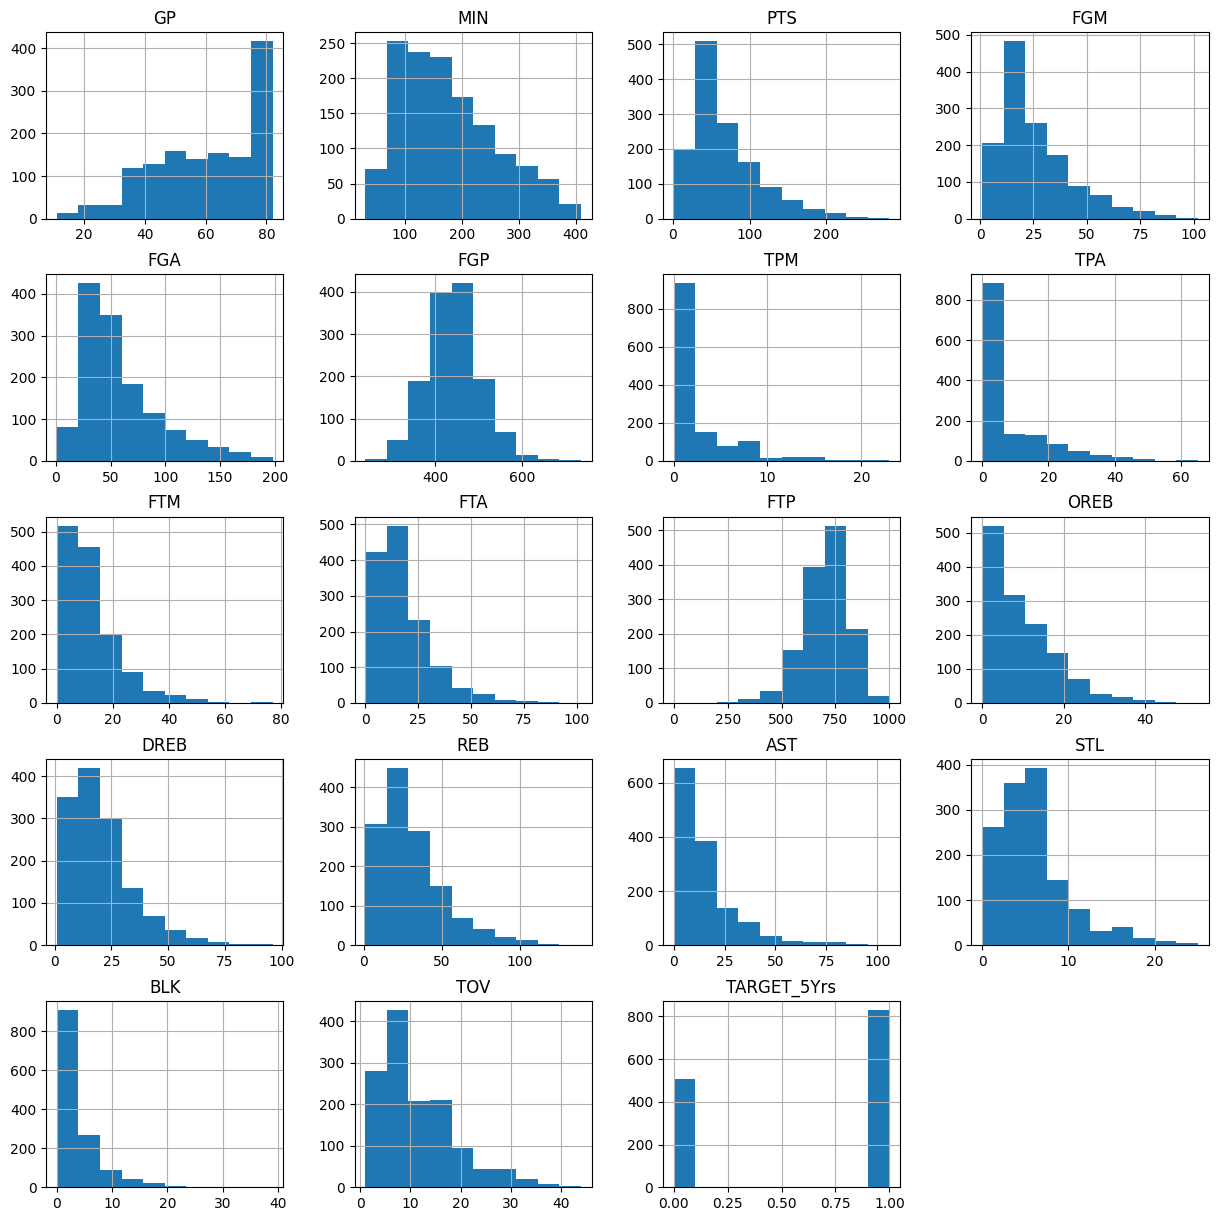

In [137]:

p = df.hist(figsize = (15,15))


## Distribusi GP (Game Played) Lamanya Pemain Bertahan di NBA

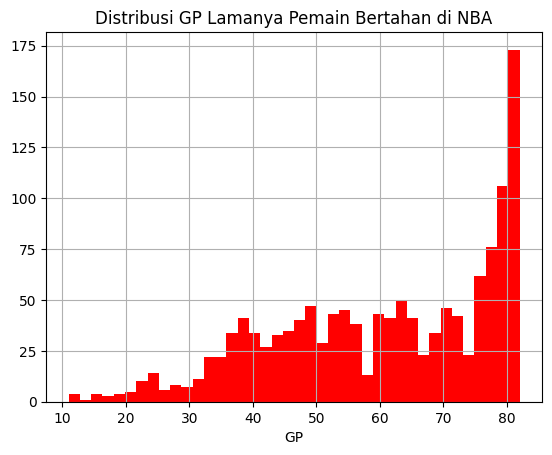

In [138]:
df['GP'].hist(bins=40, color='red')
plt.title("Distribusi GP Lamanya Pemain Bertahan di NBA")
plt.xlabel("GP");

## Distribusi Minutes Played (MP) 

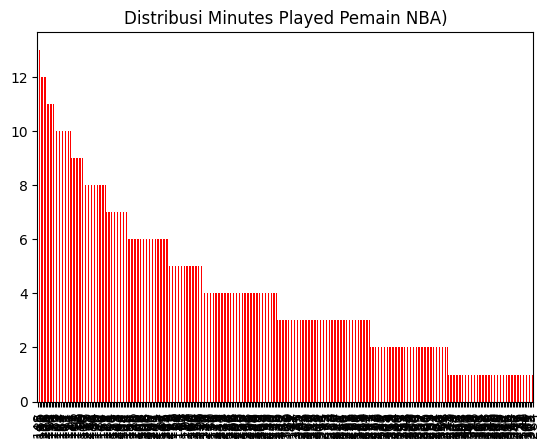

In [139]:
df['MIN'].value_counts().plot.bar(color='red')
plt.title("Distribusi Minutes Played Pemain NBA)");

# Split data

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

In [141]:
print(X.shape, X_train.shape, X_test.shape)

(1340, 18) (938, 18) (402, 18)


# MODELLING DATA

# Model training

pada model ini saya menggunakan regresi logistik dikarenakan model regresi logistik dapat memproses data dalam volume besar dengan kecepatan tinggi karena membutuhkan kapasitas komputasi yang lebih sedikit

In [142]:
model = LogisticRegression()

In [143]:
model.fit(X_train, y_train)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluasi Model

In [144]:
x_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [145]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.7057569296375267


In [146]:
y_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_predict, y_test)

In [147]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.7288557213930348


# Model Prediksi

In [148]:
input_data = (36, 274, 74, 26, 76, 347, 5, 21, 16, 23, 699, 7, 34, 41, 19, 4, 4, 13)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Prediksi Karir <5 Tahun di NBA')
else:
    print('Prediksi Karir >=5 Tahun di NBA')

[0]
Prediksi Karir <5 Tahun di NBA


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Save Model

In [149]:
import pickle

filename = 'nba.sav'
pickle.dump(model, open(filename, 'wb'))